# What time do the users answer more?

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
import matplotlib.dates as md
import datetime
from pymongo import MongoClient
import json
from bson import ObjectId
from pprint import pprint
import streamlit as st
import ast

In [96]:
cmap = ["#7570b3", "#1d84c6", "#0095bf", "#00a0a1", "#00a676", "#3da95b", "#63aa3a", 
          "#88a906", "#a0ab00", "#b7ac00", "#cfac00", "#e6ab01"]

#sns.set_palette(sns.color_palette(cmap))

In [97]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30})  
sns.set(font_scale=3.5)
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_style('ticks')

In [98]:
with open('credentials.json') as f:
    data = json.load(f)
    username = data['username']
    password = data['password']

In [99]:
client = MongoClient('mongodb://%s:%s@127.0.0.1' % (username, password))
db = client.rais1_anon

In [100]:
collection = db.sema
df = pd.DataFrame(list(collection.find()))
#df.head()

In [101]:
# Deleting the no-responses and nones
df=pd.DataFrame(list(collection.find( { '$and': [ {"data.MOOD": { "$ne": "<no-response>" }},{"data.MOOD": { "$ne": None }}, {"data.PLACE": { "$ne": "<no-response>" }},{"data.PLACE": { "$ne": None }} ] } )))

In [102]:
df=df[['user_id']].join(pd.DataFrame(df['data'].tolist(), index=df.index).add_prefix('data.'))
df.head()

,user_id,data.PARTICIPANT_ID,data.STUDY_ID,data.STUDY_NAME,data.STUDY_VERSION,data.SURVEY_ID,data.SURVEY_NAME,data.TRIGGER,data.START_END,data.CREATED_TS,...,data.TOTAL_RT,data.RAND_PROB,data.STEPS,data.STEPS_RT,data.PLACE,data.PLACE_RT,data.OTHER,data.OTHER_RT,data.MOOD,data.MOOD_RT
0,621e30c867b776a240d4aa6c,s793781328,fS8DhqE6M,RAIS Consortium Experiment,27,kgTCueF5r,Context and Mood Survey,scheduled,1,2021-06-01T22:36:00,...,4151,<no-response>,<no-response>,<no-response>,HOME,2142,<not-shown>,<not-shown>,TIRED,2009
1,621e2fb367b776a24015accd,s454041391,fS8DhqE6M,RAIS Consortium Experiment,27,kgTCueF5r,Context and Mood Survey,scheduled,1,2021-06-01T15:30:00,...,12207,<no-response>,<no-response>,<no-response>,GYM,7491,<not-shown>,<not-shown>,HAPPY,4716
2,621e326767b776a24012e179,s472993442,fS8DhqE6M,RAIS Consortium Experiment,27,kgTCueF5r,Context and Mood Survey,scheduled,1,2021-06-18T13:32:00,...,16612,<no-response>,<no-response>,<no-response>,OUTDOORS,4110,<not-shown>,<not-shown>,TENSE/ANXIOUS,12502
3,621e33b067b776a240f39e56,s887461710,fS8DhqE6M,RAIS Consortium Experiment,27,kgTCueF5r,Context and Mood Survey,scheduled,1,2021-06-16T15:46:00,...,6023,<no-response>,<no-response>,<no-response>,HOME,3535,<not-shown>,<not-shown>,HAPPY,2488
4,621e301e67b776a240608a72,s880511708,fS8DhqE6M,RAIS Consortium Experiment,26,kgTCueF5r,Context and Mood Survey,scheduled,1,2021-05-28T15:35:00,...,4832,<no-response>,<no-response>,<no-response>,WORK/SCHOOL,3257,<not-shown>,<not-shown>,ALERT,1575


In [103]:
df['Dates'] = pd.to_datetime(df['data.COMPLETED_TS'])
users=df['user_id']
days=df['Dates']
place=df['data.PLACE']
#mood=df['data.MOOD']
df = pd.concat([users, days, place],axis=1)
df = df.sort_values(by='Dates', ascending=True)
df['Dates'] = pd.to_datetime(df['Dates'].astype("str"), format='%Y-%m-%d')
df['Dates']=df['Dates'].dt.round('60min') 
#df
# Converting date to day of the week
df['DayName'] = pd.Series(df['Dates'].dt.day_name(), index=df.index) 
df

,user_id,Dates,data.PLACE,DayName
3813,621e362467b776a2404ad513,2021-04-22 21:00:00,HOME,Thursday
243,621e362467b776a2404ad513,2021-04-23 11:00:00,HOME,Friday
556,621e362467b776a2404ad513,2021-04-23 11:00:00,WORK/SCHOOL,Friday
659,621e362467b776a2404ad513,2021-04-23 15:00:00,HOME,Friday
3140,621e362467b776a2404ad513,2021-04-24 13:00:00,OTHER,Saturday
...,...,...,...,...
1661,621e331067b776a24085dd3f,2022-01-16 23:00:00,HOME,Sunday
4534,621e331067b776a24085dd3f,2022-01-17 10:00:00,HOME_OFFICE,Monday
1671,621e30f467b776a240f22944,2022-01-17 10:00:00,HOME_OFFICE,Monday
4128,621e346f67b776a24081744f,2022-01-17 11:00:00,WORK/SCHOOL,Monday


In [104]:
# Days of the week in ascending order
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#df

In [105]:
# Separating the Rounds
df1 = df[(df['Dates'] >= "2021-05-24") & (df['Dates'] <= "2021-07-26")] #Round1
df2 = df[(df['Dates'] >= "2021-11-15") & (df['Dates'] <= "2022-01-17")] #Round2
#df1

# Round1

In [106]:
# Splitting timestamp column into two separate date and time columns
df1['date']= pd.to_datetime(df1['Dates']).dt.date
df1['time']= pd.to_datetime(df1['Dates']).dt.time
days=df1['date']
hours=df1['time']
dayNames=df1['DayName']
users=df1['user_id']
place=df1['data.PLACE']
df1=pd.concat([days,hours, users, place,dayNames],axis=1)
#df1

df1['distinct_counts'] = df1.groupby(['date','time'])['user_id'].transform('nunique')

day=df1['DayName']
time=df1['time']
NumberOfAnswers=df1['distinct_counts']
df1 = df1.sort_values('DayName')
df1=pd.concat([day,time,NumberOfAnswers],axis=1)
df1.DayName = pd.Categorical(df1.DayName,categories=weekdays)

piv1 = pd.pivot_table(df1, values='distinct_counts',index=["time"], columns=["DayName"], fill_value=0)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37556/249058968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']= pd.to_datetime(df1['Dates']).dt.date
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37556/249058968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time']= pd.to_datetime(df1['Dates']).dt.time


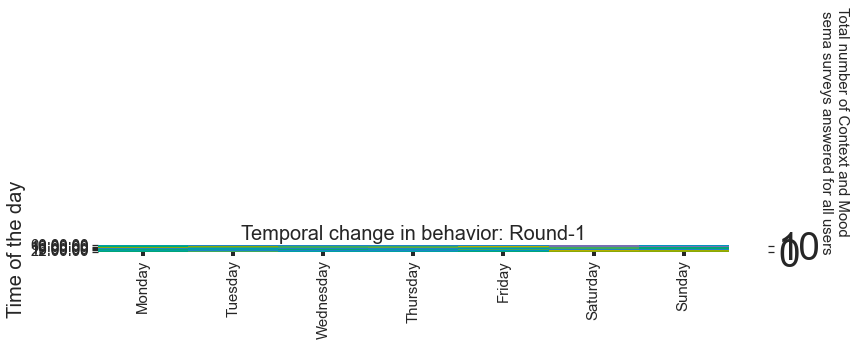

In [107]:
fig, ax = plt.subplots(figsize = (15,5))
sns.heatmap(piv1, cmap=cmap)
plt.tight_layout()
ax.set_rasterization_zorder(0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('',size=20)
plt.ylabel('Time of the day',fontsize=20)
plt.title('Temporal change in behavior: Round-1',fontsize=20)
plt.text(8, 15, 'Total number of Context and Mood \n sema surveys answered for all users', fontsize=15, rotation=270)
plt.savefig(r"visualizations\Round-1_semas_heatmap.eps", bbox_inches='tight') 
plt.savefig(r"visualizations\Round-1_semas_heatmap.png", bbox_inches='tight') 
plt.show()

# Round2

In [108]:
# Splitting timestamp column into two separate date and time columns
df2['date']= pd.to_datetime(df2['Dates']).dt.date
df2['time']= pd.to_datetime(df2['Dates']).dt.time
days=df2['date']
hours=df2['time']
dayNames=df2['DayName']
users=df2['user_id']
place=df2['data.PLACE']
df2=pd.concat([days,hours, users, place,dayNames],axis=1)
#df2

df2['distinct_counts'] = df2.groupby(['date','time'])['user_id'].transform('nunique')

day=df2['DayName']
time=df2['time']
NumberOfAnswers=df2['distinct_counts']
df2 = df2.sort_values('DayName')
df2=pd.concat([day,time,NumberOfAnswers],axis=1)
df2.DayName = pd.Categorical(df2.DayName,categories=weekdays)

piv2 = pd.pivot_table(df2, values='distinct_counts',index=["time"], columns=["DayName"], fill_value=0)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37556/3641171300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date']= pd.to_datetime(df2['Dates']).dt.date
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37556/3641171300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time']= pd.to_datetime(df2['Dates']).dt.time


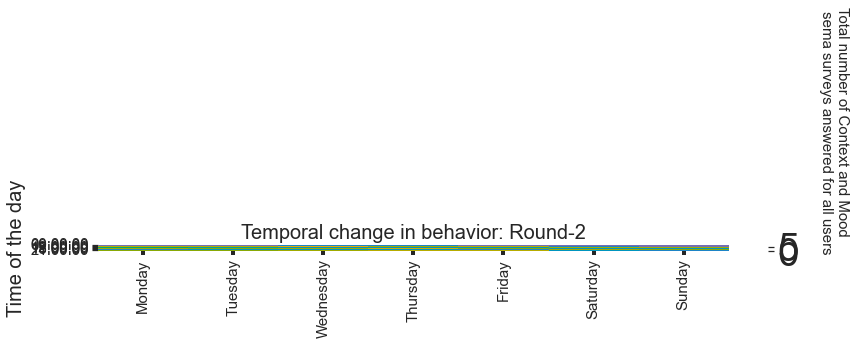

In [109]:
fig, ax = plt.subplots(figsize = (15,5))
sns.heatmap(piv2, cmap=cmap)
plt.tight_layout()
ax.set_rasterization_zorder(0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('',size=20)
plt.ylabel('Time of the day',fontsize=20)
plt.title('Temporal change in behavior: Round-2',fontsize=20)
plt.text(8, 18, 'Total number of Context and Mood \n sema surveys answered for all users', fontsize=15, rotation=270)
plt.savefig(r"visualizations\Round-2_semas_heatmap.eps", bbox_inches='tight') 
plt.savefig(r"visualizations\Round-2_semas_heatmap.png", bbox_inches='tight') 
plt.show()

# Both Rounds

In [110]:
df=df1.append(df2)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37556/2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [111]:
piv = pd.pivot_table(df, values='distinct_counts',index=["time"], columns=["DayName"], fill_value=0)

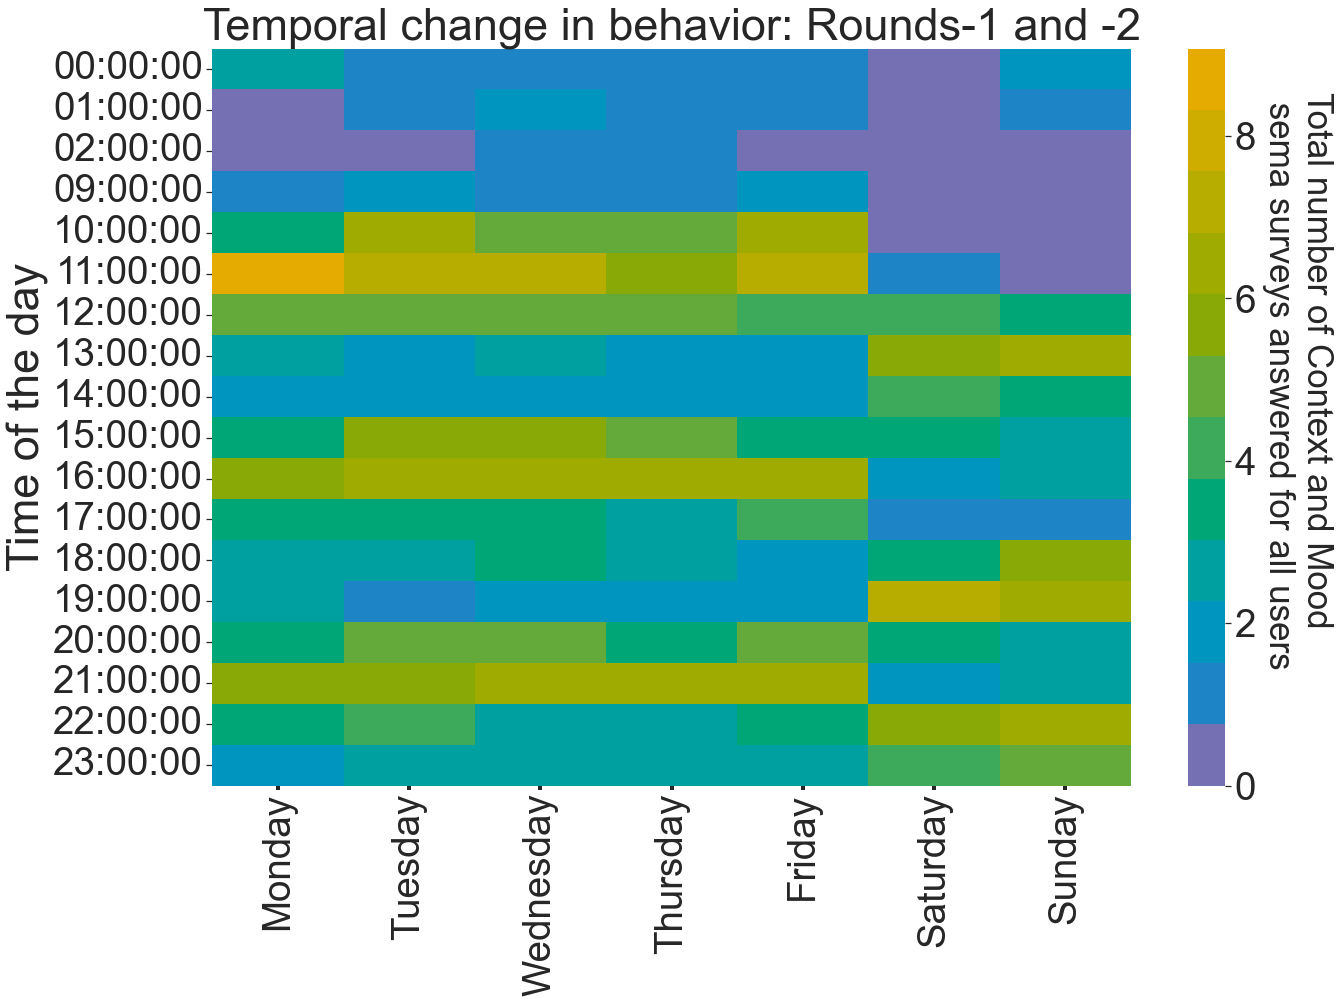

In [112]:
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(piv, cmap=cmap)
plt.tight_layout()
ax.set_rasterization_zorder(0)
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.xlabel('')
plt.ylabel('Time of the day', fontsize=45)
plt.title('Temporal change in behavior: Rounds-1 and -2', fontsize=45)
plt.text(8, 15, 'Total number of Context and Mood \n sema surveys answered for all users', rotation=270, fontsize=35)
plt.savefig(r"visualizations\BothRounds_semas_heatmap.eps", bbox_inches='tight') 
plt.savefig(r"visualizations\BothRounds_semas_heatmap.png", bbox_inches='tight') 
plt.show()

Timezone issues fixed